----
# Análisis de datos con Python - Talento Tech
##### Comisión 26261 - Ariel Palazzesi - Erica Sosa
----

# Gráficos con Seaborn
**Seaborn** es una de las bibliotecas más potentes de Python para **visualización estadística** y está construida sobre Matplotlib. Su fortaleza está en simplificar tareas comunes de análisis exploratorio y en ofrecer gráficos con una estética profesional desde el primer uso.

En este cuaderno comenzaremos repasando los **10 tipos de gráficos más relevantes** que se pueden crear con Seaborn, junto con su propósito principal.


1. **Gráfico de líneas (Lineplot)**
2. **Gráfico de barras (Barplot)**
3. **Gráfico de dispersión (Scatterplot)**
4. **Gráfico de conteo (Countplot)**
5. **Histograma y densidad (Histplot / KDEplot)**
6. **Boxplot (Diagrama de caja y bigotes)**
7. **Violinplot**
8. **Gráfico de pares (Pairplot)**
9. **Heatmap (Mapa de calor)**
10. **Jointplot**

---

# 1. Gráfico de líneas (Lineplot)

### Básico

El gráfico de líneas se utiliza para mostrar **tendencias o cambios** de una variable numérica a lo largo del tiempo o respecto a otra variable ordenada.

En este ejemplo:

* Usaremos la función `sns.lineplot()`.
* El dataset será una pequeña tabla con ventas mensuales.
* Parámetros:
  - `x`: variable del eje horizontal (Mes).
  - `y`: variable del eje vertical (Ventas).
  - `data`: DataFrame con los datos.
* Se incluyen etiquetas y un título para mejorar la presentación.


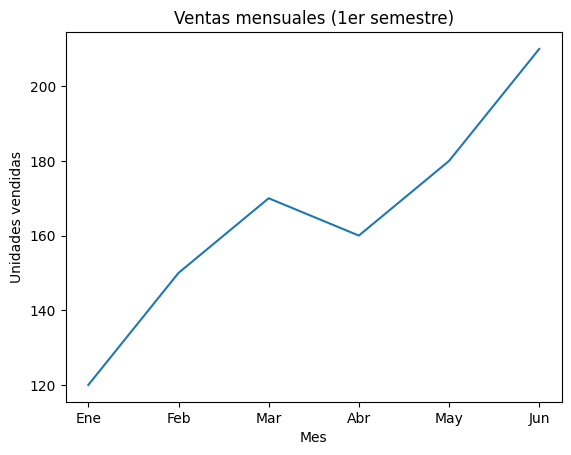

In [ ]:
# Importamos las librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Creamos un DataFrame simple
df = pd.DataFrame({
    "Mes": ["Ene", "Feb", "Mar", "Abr", "May", "Jun"],
    "Ventas": [120, 150, 170, 160, 180, 210]
})

# Creamos el gráfico de líneas
sns.lineplot(data=df, x="Mes", y="Ventas")

# Personalizamos el gráfico
plt.title("Ventas mensuales (1er semestre)")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.show()


### Gráfico de líneas avanzado

Este ejemplo muestra cómo personalizar un gráfico de líneas para hacerlo más informativo y atractivo:

* Se agregan dos series de datos (dos años).
* Se usa el parámetro `hue` para diferenciar categorías (año).
* Se personalizan:
  - `style`: para cambiar el tipo de línea según la categoría.
  - `markers`: para mostrar puntos en cada valor.
  - `palette`: para definir una paleta de colores.
  - `linewidth`: grosor de las líneas.
* Se activa `plt.grid()` y se ajustan etiquetas y leyenda.


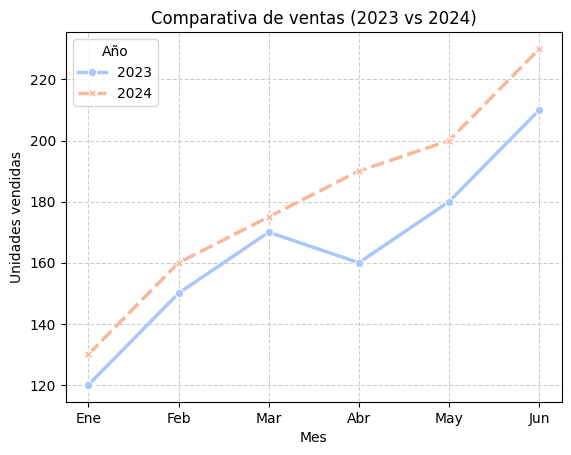

In [ ]:
# Creamos un DataFrame con dos años de ventas
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun"]
ventas_2023 = [120, 150, 170, 160, 180, 210]
ventas_2024 = [130, 160, 175, 190, 200, 230]

df_multi = pd.DataFrame({
    "Mes": meses * 2,
    "Ventas": ventas_2023 + ventas_2024,
    "Año": ["2023"] * 6 + ["2024"] * 6
})

# Gráfico de líneas avanzado
sns.lineplot(
    data=df_multi,
    x="Mes", y="Ventas", hue="Año",
    style="Año", markers=True,
    linewidth=2.5, palette="coolwarm"
)

# Personalización adicional
plt.title("Comparativa de ventas (2023 vs 2024)")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Año")
plt.show()


2. **Gráfico de barras (Barplot)**

### Básico

El gráfico de barras permite **comparar valores numéricos entre diferentes categorías**.

En este ejemplo básico:

* Usamos la función `sns.barplot()`.
* Representaremos las ventas promedio de distintos productos.
* Parámetros principales:
  - `x`: variable categórica (nombre del producto).
  - `y`: variable numérica (ventas promedio).
  - `data`: DataFrame con los datos.

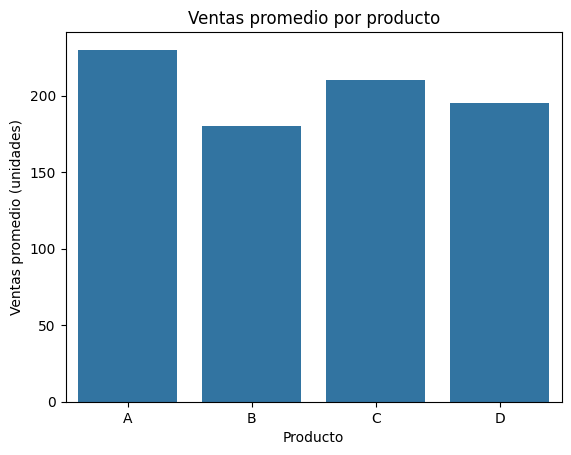

In [ ]:
# Creamos un pequeño dataset
df_productos = pd.DataFrame({
    "Producto": ["A", "B", "C", "D"],
    "Ventas_Promedio": [230, 180, 210, 195]
})

# Gráfico de barras simple
sns.barplot(data=df_productos, x="Producto", y="Ventas_Promedio")

# Personalización básica
plt.title("Ventas promedio por producto")
plt.xlabel("Producto")
plt.ylabel("Ventas promedio (unidades)")
plt.show()


### Gráfico de barras avanzado

En este ejemplo mostraremos cómo comparar categorías dentro de **dos grupos** (por ejemplo, ventas por región y por año).

Características del gráfico:

* Usamos `hue` para representar una segunda variable categórica (Año).
* Se define una paleta de colores (`palette`).
* Se ajusta el ancho de las barras (`width`).
* Se cambia la orientación del gráfico (`orient="h"`) para hacerlo horizontal.
* Se agregan etiquetas y cuadrícula para una mejor lectura.


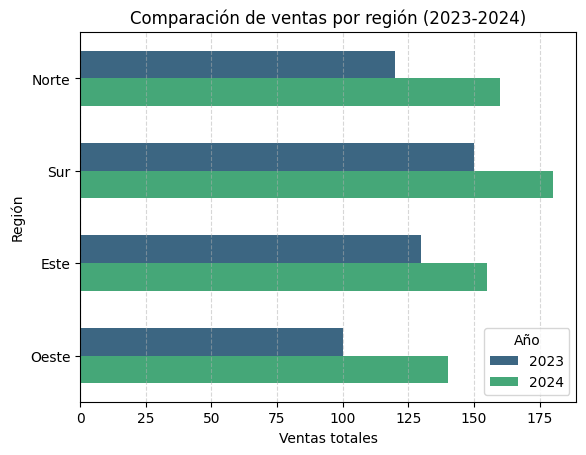

In [ ]:
# Creamos un dataset más complejo
df_regional = pd.DataFrame({
    "Región": ["Norte", "Sur", "Este", "Oeste"] * 2,
    "Año": ["2023"] * 4 + ["2024"] * 4,
    "Ventas": [120, 150, 130, 100, 160, 180, 155, 140]
})

# Gráfico de barras agrupadas (horizontal)
sns.barplot(
    data=df_regional,
    x="Ventas", y="Región",
    hue="Año",
    palette="viridis", width=0.6
)

# Personalización avanzada
plt.title("Comparación de ventas por región (2023-2024)")
plt.xlabel("Ventas totales")
plt.ylabel("Región")
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.legend(title="Año")
plt.show()


# 3. Gráfico de dispersión (Scatterplot)

### Básico

El gráfico de dispersión permite visualizar la **relación entre dos variables numéricas**.

En este ejemplo:

* Usamos la función `sns.scatterplot()`.
* El dataset contiene datos ficticios de altura y peso.
* Parámetros:
  - `x`: variable del eje horizontal.
  - `y`: variable del eje vertical.
  - `data`: DataFrame que contiene los datos.
* Cada punto representa una observación individual.


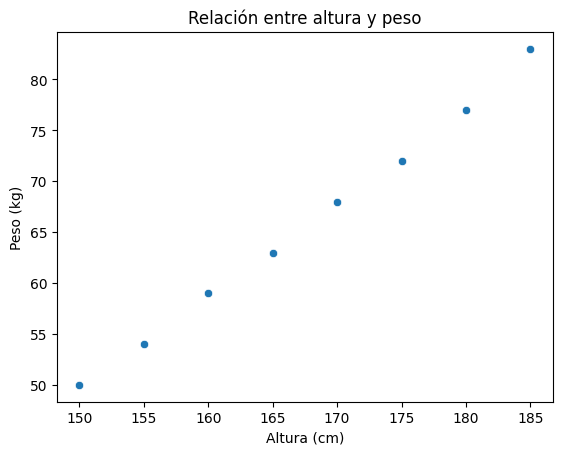

In [ ]:
# Creamos un dataset simple
df_personas = pd.DataFrame({
    "Altura_cm": [150, 155, 160, 165, 170, 175, 180, 185],
    "Peso_kg":   [50, 54, 59, 63, 68, 72, 77, 83]
})

# Gráfico de dispersión simple
sns.scatterplot(data=df_personas, x="Altura_cm", y="Peso_kg")

# Personalización
plt.title("Relación entre altura y peso")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.show()


### Gráfico de dispersión avanzado

En este ejemplo usaremos un dataset más rico y mostraremos cómo agregar información adicional.

Características del gráfico:

* Dataset: `tips` (incluido en Seaborn).
* Mostramos la relación entre el monto total de la cuenta (`total_bill`) y la propina (`tip`).
* Parámetros adicionales:
  - `hue`: colorea los puntos según una categoría (por ejemplo, sexo del cliente).
  - `size`: cambia el tamaño de los puntos según otra variable (por ejemplo, número de comensales).
  - `style`: cambia la forma de los marcadores según una categoría.
  - `palette`: define la paleta de colores.
* Se agrega una cuadrícula y un título descriptivo.


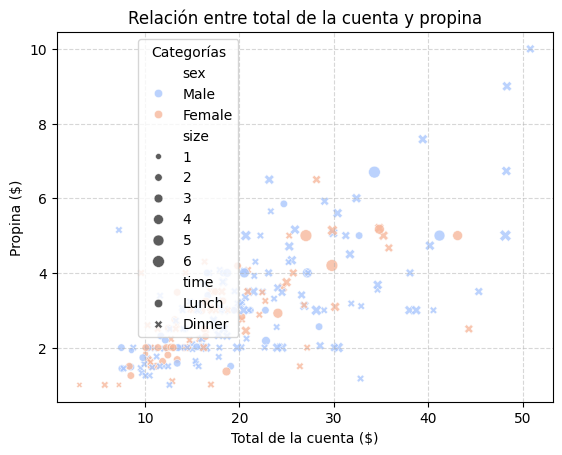

In [23]:
# Cargamos un dataset incorporado en Seaborn
df_tips = sns.load_dataset("tips")

# Gráfico de dispersión avanzado
sns.scatterplot(
    data=df_tips,
    x="total_bill", y="tip",
    hue="sex", size="size",
    style="time",
    palette="coolwarm",
    alpha=0.8
)

# Personalización
plt.title("Relación entre total de la cuenta y propina")
plt.xlabel("Total de la cuenta ($)")
plt.ylabel("Propina ($)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Categorías", bbox_to_anchor=(0.15, 1), loc='upper left')
plt.show()


# 4. Gráfico de conteo (Countplot)

----

El **gráfico de conteo** muestra cuántas veces aparece cada categoría dentro de una variable cualitativa. Es una forma rápida de ver la **frecuencia** o la **distribución** de clases en un conjunto de datos.

Puede usarse, por ejemplo, para conocer la cantidad de productos por tipo, el número de pasajeros por clase en el Titanic o la proporción de respuestas en una encuesta. También resulta útil al inicio del análisis exploratorio para detectar **desequilibrios** en categorías o verificar la calidad de los datos antes de aplicar modelos estadísticos o de machine learning.

---

### Básico

El gráfico de conteo muestra **cuántas veces aparece cada categoría** dentro de una variable.

En este ejemplo:

* Usamos la función `sns.countplot()`.
* Mostraremos la cantidad de personas por grupo de preferencia de color.
* Parámetros principales:
  - `x`: variable categórica.
  - `data`: DataFrame que contiene los datos.
* Cada barra representa la **frecuencia** de esa categoría.


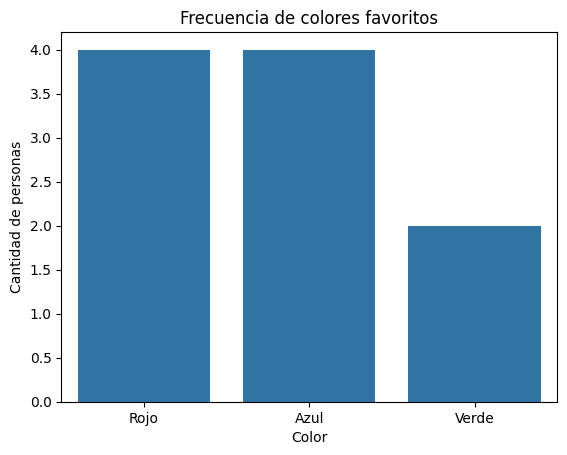

In [ ]:
# Creamos un dataset simple
df_colores = pd.DataFrame({
    "Color_favorito": ["Rojo", "Azul", "Verde", "Rojo", "Azul", "Azul", "Rojo", "Verde", "Rojo", "Azul"]
})

# Gráfico de conteo simple
sns.countplot(data=df_colores, x="Color_favorito")

# Personalización
plt.title("Frecuencia de colores favoritos")
plt.xlabel("Color")
plt.ylabel("Cantidad de personas")
plt.show()


### Gráfico de conteo avanzado

En este ejemplo mostramos cómo mejorar el gráfico añadiendo una **segunda categoría** y personalizando su estilo.

Características del gráfico:

* Dataset: `titanic` (incluido en Seaborn).
* Mostramos la cantidad de pasajeros por clase (`class`), diferenciando por sexo (`sex`).
* Parámetros adicionales:
  - `hue`: agrega una categoría adicional (sexo).
  - `palette`: define la paleta de colores.
  - `order`: ordena las categorías en el eje.
  - `orient`: permite hacer el gráfico horizontal si se desea.
* Se agregan etiquetas, cuadrícula y título.


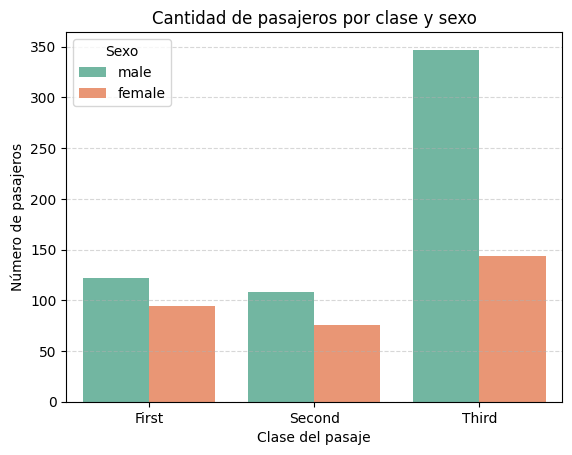

In [ ]:
# Cargamos un dataset incluido en Seaborn
df_titanic = sns.load_dataset("titanic")

# Gráfico de conteo avanzado
sns.countplot(
    data=df_titanic,
    x="class", hue="sex",
    palette="Set2"
)

# Personalización
plt.title("Cantidad de pasajeros por clase y sexo")
plt.xlabel("Clase del pasaje")
plt.ylabel("Número de pasajeros")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Sexo")
plt.show()


# 5.Histograma y densidad (Histplot / KDEplot)

---

El histograma y el gráfico de densidad muestran cómo se distribuyen los valores de una variable numérica. Permiten identificar concentraciones, dispersiones, valores típicos y posibles outliers.

El histograma agrupa los datos en intervalos o “bins” y cuenta cuántos valores caen en cada uno, mientras que la curva de densidad (KDE) suaviza esa distribución para mostrar su forma general.

Se usan en análisis exploratorio para estudiar la **distribución de una variable**, comparar grupos o evaluar si los datos siguen una forma aproximadamente normal.


---

### Histograma Básico

El histograma muestra **cómo se distribuyen los valores** de una variable numérica.

En este ejemplo:

* Usamos la función `sns.histplot()`.
* El dataset contendrá edades de un grupo de personas.
* Parámetros principales:
  - `x`: variable numérica a representar.
  - `bins`: cantidad de intervalos (barras).
  - `data`: DataFrame con los datos.
* El eje X representa los intervalos de valores y el eje Y la frecuencia.


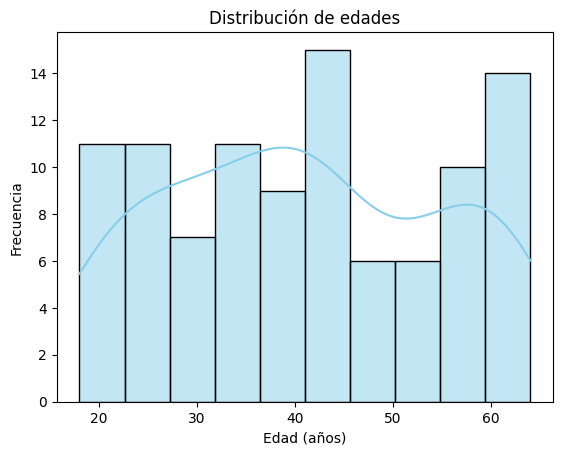

In [25]:
# Importamos librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creamos un dataset simple con edades aleatorias
np.random.seed(42)
df_edades = pd.DataFrame({
    "Edad": np.random.randint(18, 65, 100)
})

# Histograma simple
sns.histplot(data=df_edades,
             x="Edad",
             bins=10,
             kde=True,
             color="skyblue")

# Personalización
plt.title("Distribución de edades")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.show()


### Histograma avanzado con densidad (KDE)

En este ejemplo combinaremos un **histograma** con una **curva de densidad (KDE)**, que muestra una versión suavizada de la distribución.

Características:

* Dataset: `penguins` (incluido en Seaborn).
* Variable analizada: `flipper_length_mm` (longitud de aletas).
* Parámetros adicionales:
  - `hue`: colorea por especie.
  - `multiple`: controla la superposición de los histogramas (puede ser `"stack"`, `"dodge"` o `"layer"`).
  - `kde=True`: activa la curva de densidad.
  - `element`: define el estilo de las barras (`"bars"`, `"step"`, `"poly"`).
* Se personaliza la paleta de colores, etiquetas y cuadrícula.


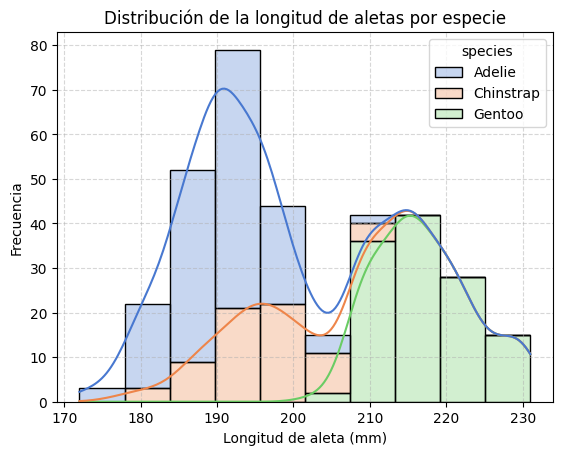

In [24]:
# Cargamos un dataset incluido en Seaborn
df_penguins = sns.load_dataset("penguins")

# Histograma con KDE y diferenciación por especie
sns.histplot(
    data=df_penguins,
    x="flipper_length_mm",
    hue="species",
    kde=True,
    multiple="stack",
    element="bars",
    palette="muted",
    alpha=0.8
)

# Personalización
plt.title("Distribución de la longitud de aletas por especie")
plt.xlabel("Longitud de aleta (mm)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# 6.Boxplot (Diagrama de caja y bigotes)

---

El boxplot muestra la **distribución de una variable numérica** mediante sus valores estadísticos más relevantes: **mediana**, **cuartiles** y (posibles) **outliers**.

Resume de forma compacta la posición y dispersión de los datos, permitiendo comparar varios grupos o categorías. Es especialmente útil para detectar **asimetrías, valores atípicos y diferencias entre conjuntos de datos**, por ejemplo al comparar edades, ingresos o puntajes entre distintos grupos.


---

### Boxplot Básico

El boxplot (diagrama de caja y bigotes) resume la **distribución de una variable numérica** mediante sus principales medidas de posición y dispersión.

En este ejemplo:

* Usamos la función `sns.boxplot()`.
* Mostramos la distribución de puntajes de un grupo de alumnos.
* Parámetros principales:
  - `x`: variable categórica (por ejemplo, grupo).
  - `y`: variable numérica (por ejemplo, puntaje).
  - `data`: DataFrame con los datos.
* El rectángulo central muestra el **rango intercuartílico (IQR)** y la línea interna marca la **mediana**.
* Los puntos fuera del rango son **valores atípicos**.


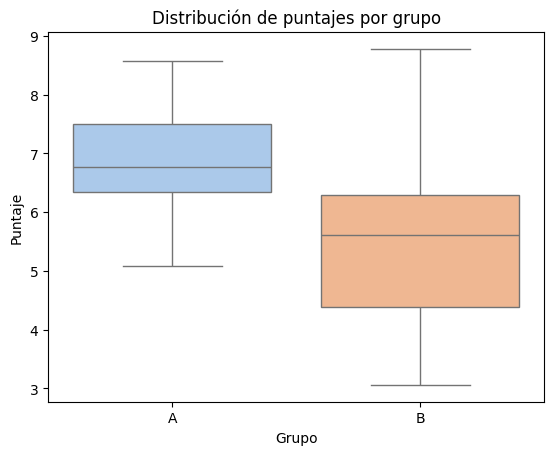

In [29]:
# Importamos librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creamos un dataset simple
np.random.seed(42)
df_notas = pd.DataFrame({
    "Grupo": ["A"] * 20 + ["B"] * 20,
    "Puntaje": np.concatenate([
        np.random.normal(7, 1, 20),  # grupo A
        np.random.normal(6, 1.5, 20) # grupo B
    ])
})

# Boxplot simple
sns.boxplot(data=df_notas,
            x="Grupo",
            hue="Grupo",
            y="Puntaje",
            palette="pastel")

# Personalización
plt.title("Distribución de puntajes por grupo")
plt.xlabel("Grupo")
plt.ylabel("Puntaje")
plt.show()


### Boxplot avanzado

En este ejemplo usaremos un dataset más grande y mostraremos cómo enriquecer el boxplot con categorías múltiples y estilos.

Características:

* Dataset: `titanic` (incluido en Seaborn).
* Variable numérica: `age`.
* Variables categóricas: `class` (clase del pasaje) y `sex` (sexo).
* Parámetros adicionales:
  - `hue`: permite comparar dentro de cada categoría (por ejemplo, hombres vs mujeres).
  - `palette`: paleta de colores para distinguir grupos.
  - `width`: ancho de las cajas.
  - `fliersize`: tamaño de los puntos atípicos.
* Se agregan etiquetas, título y cuadrícula.


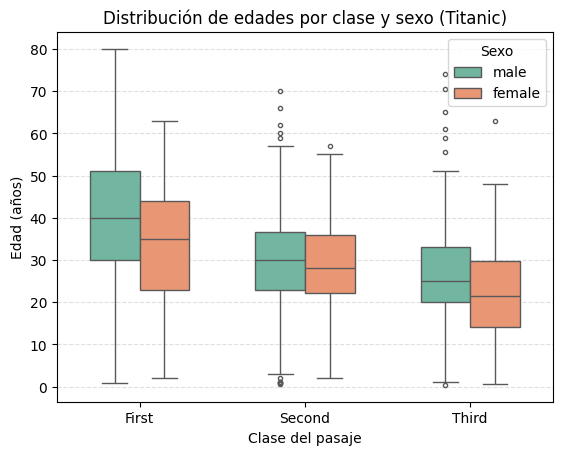

In [31]:
# Cargamos el dataset Titanic
df_titanic = sns.load_dataset("titanic")

# Boxplot avanzado
sns.boxplot(
    data=df_titanic,
    x="class",
    y="age",
    hue="sex",
    palette="Set2", width=0.6,
    fliersize=3
)

# Personalización
plt.title("Distribución de edades por clase y sexo (Titanic)")
plt.xlabel("Clase del pasaje")
plt.ylabel("Edad (años)")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Sexo", loc="upper right")
plt.show()


# 7. Violinplot

---

El violinplot combina la información estadística del boxplot con la forma de la **distribución de los datos**.

Muestra la mediana y los cuartiles dentro de una curva que representa la densidad de probabilidad, lo que permite ver no solo los valores centrales sino también dónde se concentran los datos.

Se utiliza para **comparar distribuciones entre grupos** y detectar diferencias en forma, dispersión o simetría. Es especialmente útil cuando las muestras son pequeñas o presentan múltiples picos.


---

### Violinplot básico con Seaborn

El gráfico de violín muestra la **distribución de una variable numérica** por categoría, similar a un boxplot,  
pero con una forma que indica la **densidad** de los datos (qué valores son más frecuentes).

En este ejemplo:

* Usamos la función `sns.violinplot()`.
* Mostraremos la distribución de puntajes en dos grupos.
* Parámetros principales:
  - `x`: variable categórica.
  - `y`: variable numérica.
  - `data`: DataFrame con los datos.
* El ancho del “violín” representa la concentración de valores.


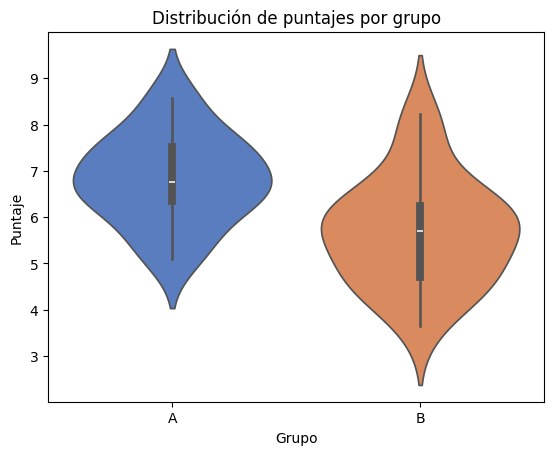

In [32]:
# Importamos librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dataset simple
np.random.seed(42)
df_puntajes = pd.DataFrame({
    "Grupo": ["A"] * 20 + ["B"] * 20,
    "Puntaje": np.concatenate([
        np.random.normal(7, 1, 20),
        np.random.normal(6, 1.2, 20)
    ])
})

# Gráfico de violín básico
sns.violinplot(data=df_puntajes,
               x="Grupo",
              hue = "Grupo",
               y="Puntaje",
               palette="muted"
               )

# Personalización
plt.title("Distribución de puntajes por grupo")
plt.xlabel("Grupo")
plt.ylabel("Puntaje")
plt.show()


### Violinplot avanzado

En este ejemplo crearemos un violín más informativo, con varias capas de información.

Características:

* Dataset: `penguins` (incluido en Seaborn).
* Mostraremos la distribución de la longitud de aletas (`flipper_length_mm`) por especie.
* Parámetros adicionales:
  - `hue`: divide cada violín por categoría (por ejemplo, sexo).
  - `split=True`: combina ambos grupos en el mismo violín (uno a cada lado).
  - `inner`: muestra detalles adicionales dentro del violín (`"box"`, `"quartile"`, `"stick"`, o `"point"`).
  - `palette`: define los colores.
* Se agregan etiquetas, cuadrícula y leyenda personalizada.


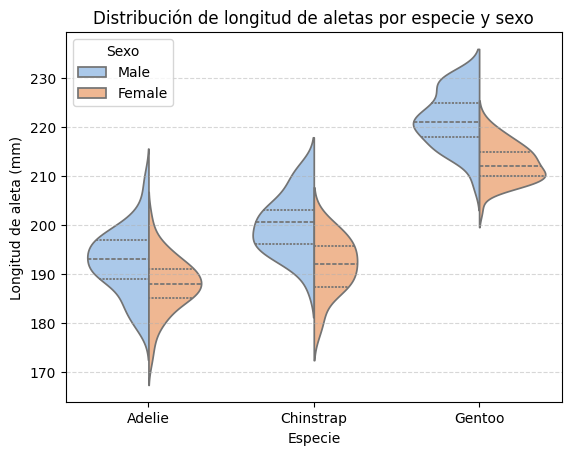

In [ ]:
# Cargamos el dataset de pingüinos
df_penguins = sns.load_dataset("penguins")

# Violinplot avanzado
sns.violinplot(
    data=df_penguins,
    x="species",
    y="flipper_length_mm",
    hue="sex",
    split=True,
    inner="quartile",
    palette="pastel"
)

# Personalización
plt.title("Distribución de longitud de aletas por especie y sexo")
plt.xlabel("Especie")
plt.ylabel("Longitud de aleta (mm)")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Sexo")
plt.show()


# 8. Gráfico de pares (Pairplot)

---

El pairplot muestra simultáneamente las **relaciones entre todas las variables numéricas** de un conjunto de datos.

Genera una matriz de gráficos de dispersión para cada par de variables y, en la diagonal, la distribución individual de cada una. Es muy útil para detectar **correlaciones, agrupamientos y patrones** entre variables, así como posibles outliers o relaciones no lineales.

Se usa principalmente en la fase exploratoria de análisis multivariable, por ejemplo al estudiar medidas físicas, variables socioeconómicas o características de un dataset antes de modelarlo.

Este gráfico puede parecer abrumador al principio, pero es una de las visualizaciones más poderosas de Seaborn.

---


### Básico

El `pairplot` crea automáticamente una **matriz de gráficos de dispersión** para todas las combinaciones de variables numéricas.

En este ejemplo:

* Usamos la función `sns.pairplot()`.
* Dataset: `iris` (incluido en Seaborn), con medidas de flores.
* Parámetros principales:
  - `data`: DataFrame a analizar.
  - `hue`: colorea los puntos según una categoría (especie).
* Las diagonales muestran histogramas individuales de cada variable.
* Es muy útil para detectar correlaciones o agrupamientos.


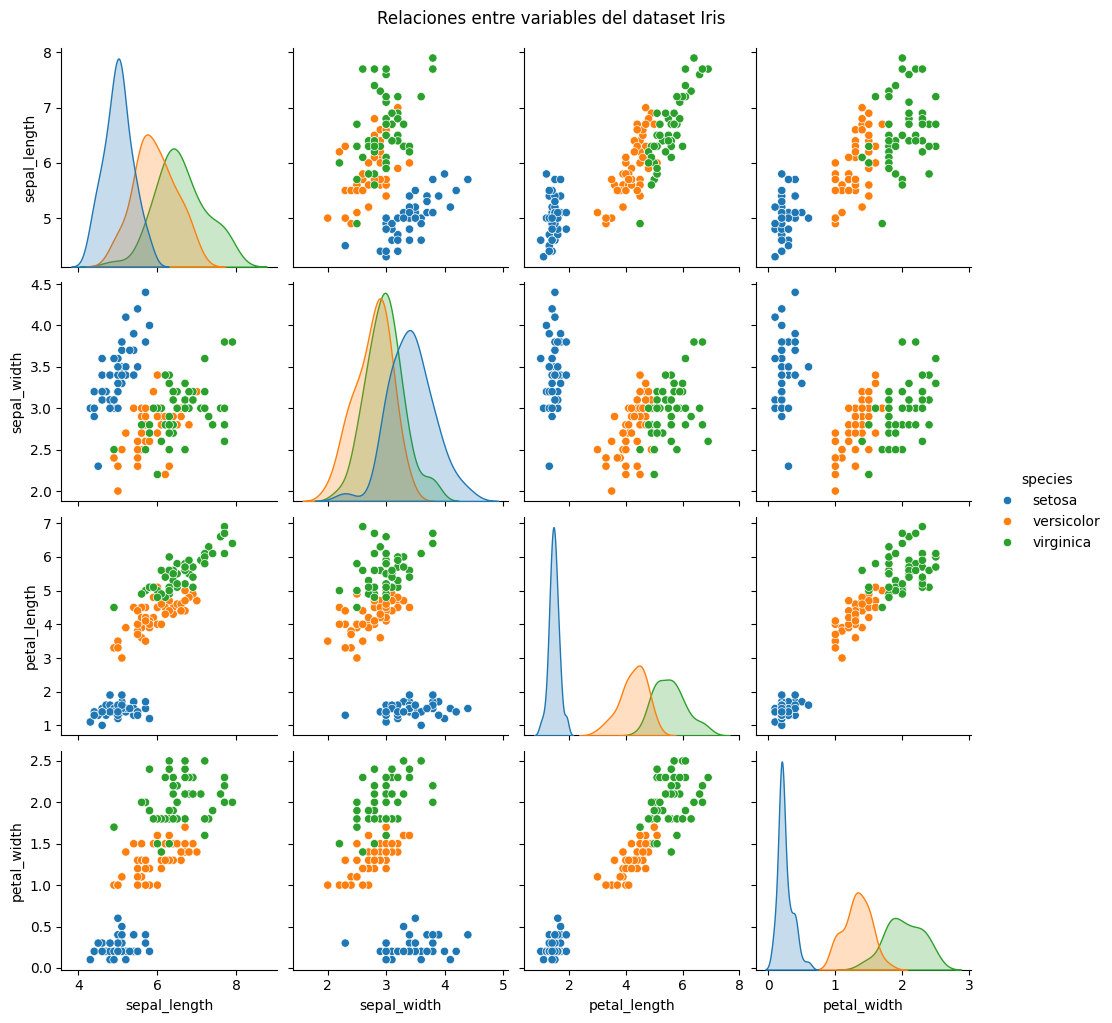

In [ ]:
# Importamos librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset de flores Iris
df_iris = sns.load_dataset("iris")

# Pairplot básico
sns.pairplot(data=df_iris, hue="species")

# Personalización
plt.suptitle("Relaciones entre variables del dataset Iris", y=1.02)
plt.show()


### ¿Qué muestra el gráfico anterior?

El **pairplot** genera una **matriz de gráficos de dispersión** (scatterplots) que compara **todas las variables numéricas entre sí** dentro del dataset.
El dataset *Iris* tiene cuatro variables numéricas:

* `sepal_length` (largo del sépalo)
* `sepal_width` (ancho del sépalo)
* `petal_length` (largo del pétalo)
* `petal_width` (ancho del pétalo)

y una variable categórica: `species` (la especie de flor).

---

### ¿Cómo se lee?

Cada **celda** del gráfico representa una comparación entre dos variables:

* **Filas y columnas**: indican las variables comparadas.
  Por ejemplo, la celda en la intersección de la fila `petal_length` y la columna `sepal_length` muestra cómo se relacionan esas dos medidas.

* **Puntos**: cada punto es una flor.
  Su color indica la especie:

  * Azul: *setosa*
  * Naranja: *versicolor*
  * Verde: *virginica*

* **Diagonal principal**: muestra la **distribución individual** de cada variable (usando una curva KDE o histograma).
  Por ejemplo, podés ver que las *setosa* (azules) tienen pétalos mucho más cortos que las otras dos especies.

---

### ¿Qué se puede interpretar?

1. **Separación entre especies:**
   Las nubes de puntos no se superponen del todo, lo que indica que las especies tienen medidas distintas.
   Por ejemplo, *setosa* (azul) se diferencia claramente de las otras dos en `petal_length` y `petal_width`.

2. **Relaciones entre variables:**
   Algunas combinaciones muestran relaciones casi lineales — por ejemplo, `petal_length` y `petal_width` están fuertemente correlacionadas (al crecer una, crece la otra).

3. **Distribución individual:**
   En la diagonal, podés ver cómo se distribuye cada variable:

   * `sepal_length` y `sepal_width` son más variables.
   * `petal_length` y `petal_width` muestran diferencias marcadas entre especies.

---


El gráfico te permite observar **cómo se relacionan todas las medidas florales entre sí** y **qué tan bien se separan las especies** según esas medidas.
Es una herramienta clave para el **análisis exploratorio** antes de entrenar modelos de clasificación o agrupamiento.

### Pairplot avanzado

En este ejemplo aprovechamos parámetros adicionales para personalizar el estilo y la información del gráfico.

Características:

* Dataset: `penguins` (incluido en Seaborn).
* Variables numéricas: medidas del cuerpo del pingüino.
* Parámetros adicionales:
  - `diag_kind`: define el tipo de gráfico en la diagonal (`"hist"` o `"kde"`).
  - `palette`: define la paleta de colores.
  - `corner=True`: muestra solo la mitad inferior de la matriz, para evitar duplicados.
  - `plot_kws`: pasa argumentos a los gráficos de dispersión (por ejemplo, tamaño y transparencia de puntos).
* Permite observar tendencias y correlaciones de forma muy visual.


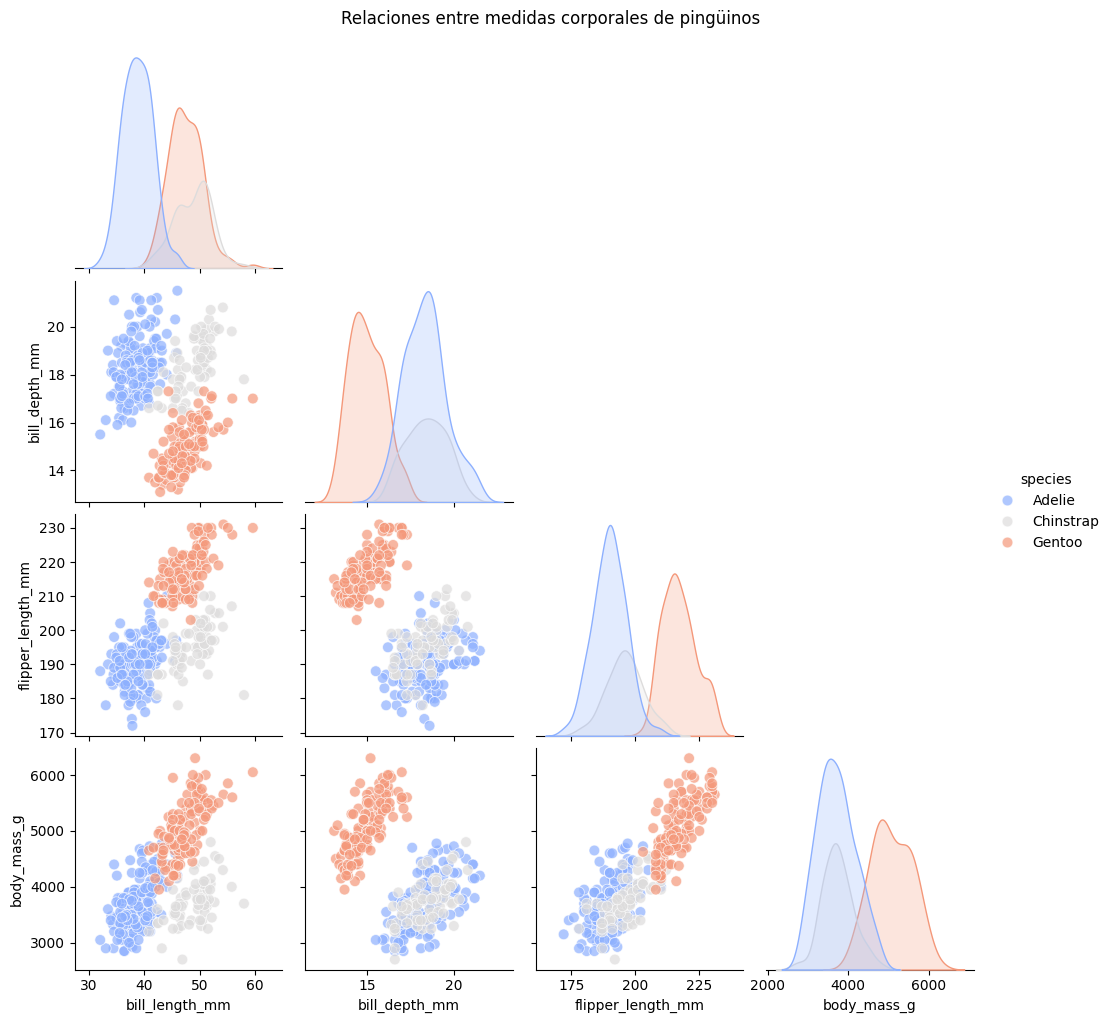

In [ ]:
# Cargamos el dataset de pingüinos
df_penguins = sns.load_dataset("penguins")

# Pairplot avanzado
sns.pairplot(
    data=df_penguins,
    hue="species",
    diag_kind="kde",
    palette="coolwarm",
    corner=True,
    plot_kws={"alpha": 0.7, "s": 60}
)

# Personalización
plt.suptitle("Relaciones entre medidas corporales de pingüinos", y=1.02)
plt.show()


Podemos filtrar el dataset para quedarnoa solo con **dos especies**, y luego volver a generar el mismo gráfico.

Ahora aparecen **solo dos colores**, porque el parámetro `hue="species"` solo tendrá dos categorías.

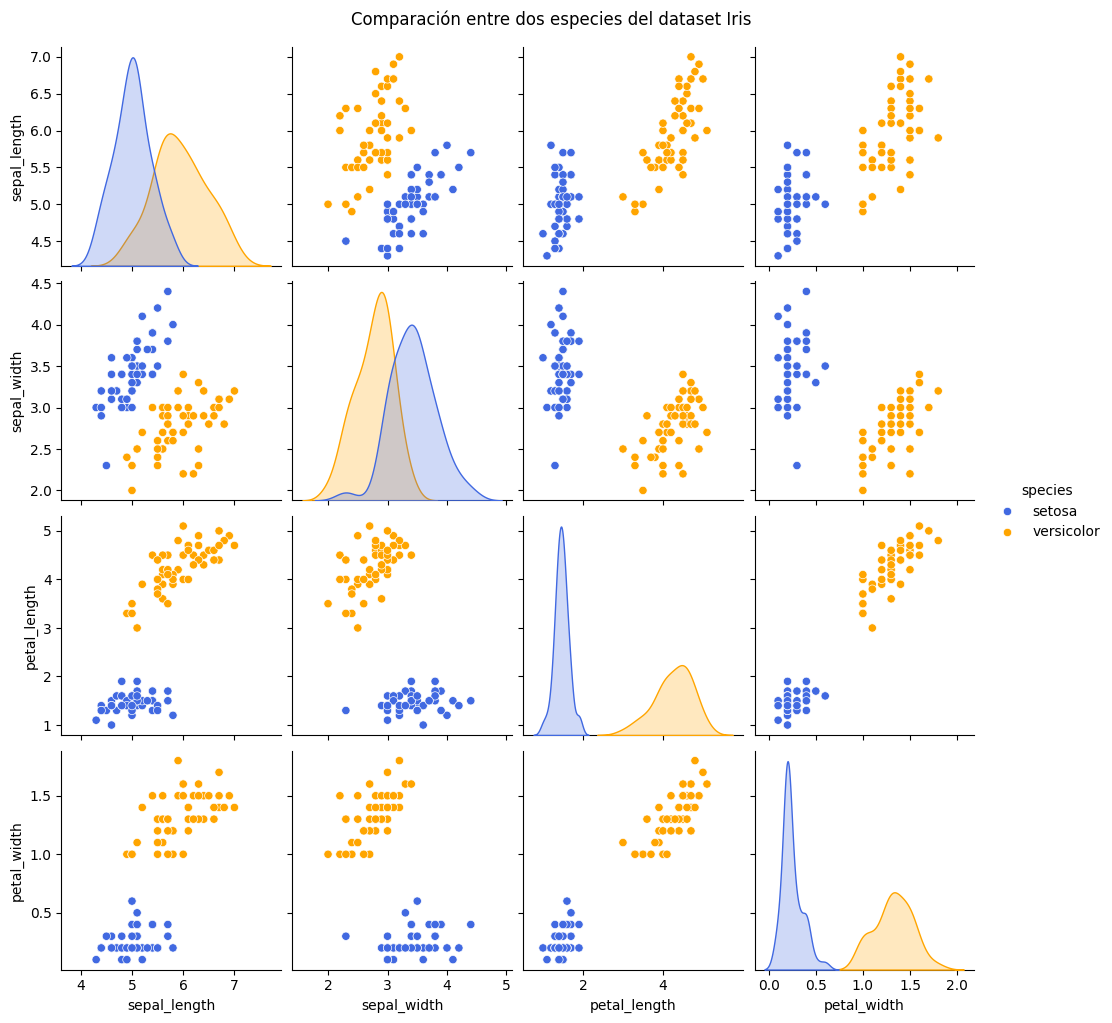

In [ ]:
# Importamos librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset Iris
df_iris = sns.load_dataset("iris")

# Filtramos solo dos especies: setosa y versicolor
df_dos = df_iris[df_iris["species"].isin(["setosa", "versicolor"])]

# Generamos el pairplot solo con esas dos especies
sns.pairplot(data=df_dos, hue="species", palette=["royalblue", "orange"])

# Personalización
plt.suptitle("Comparación entre dos especies del dataset Iris", y=1.02)
plt.show()

* En cada celda del gráfico solo hay **dos colores (azul y naranja)**.
* Cada color representa una especie: *setosa* y *versicolor*.
* Se observa más claramente la **separación** entre ambas en las variables relacionadas con el pétalo (`petal_length`, `petal_width`).
* En cambio, en las variables del sépalo (`sepal_length`, `sepal_width`), los puntos se **mezclan más**, mostrando que esas medidas no distinguen tan bien las especies.


# 9. Heatmap (Mapa de calor)

### Básico

El `heatmap` permite visualizar los valores de una matriz mediante colores.

En este ejemplo:

* Usamos la función `sns.heatmap()`.
* Representaremos la **matriz de correlación** entre variables numéricas.
* Dataset: `iris` (incluido en Seaborn).
* Parámetros principales:
  - `data`: matriz o DataFrame a graficar.
  - `annot=True`: muestra los valores numéricos dentro de las celdas.
  - `cmap`: paleta de colores.
  - `fmt`: formato de los valores.
* Ideal para identificar relaciones fuertes (positivas o negativas) entre variables.


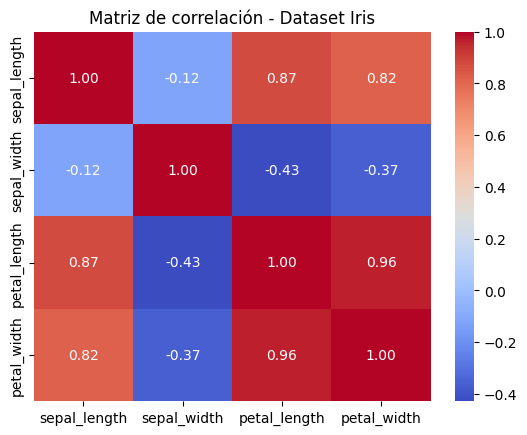

In [ ]:
# Importamos librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset Iris
df_iris = sns.load_dataset("iris")

# Calculamos la matriz de correlación
matriz_corr = df_iris.corr(numeric_only=True)

# Mapa de calor básico
sns.heatmap(data=matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")

# Personalización
plt.title("Matriz de correlación - Dataset Iris")
plt.show()


### Heatmap avanzado

En este ejemplo creamos un mapa de calor más complejo y estilizado.

Características:

* Dataset: `flights` (incluido en Seaborn).
* Representa el número de pasajeros por mes y año.
* Parámetros adicionales:
  - `pivot()`: convierte los datos en formato de tabla (años como filas, meses como columnas).
  - `annot=True`: muestra los valores.
  - `cmap`: define una paleta de colores más visual (por ejemplo `"YlOrRd"` o `"mako"`).
  - `linewidths`: separa las celdas con líneas.
  - `cbar_kws`: personaliza la barra de color.
* Se agregan título, etiquetas y cuadrícula visual suave.


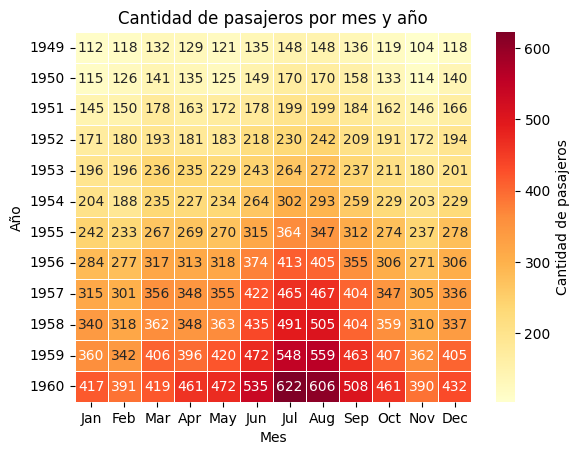

In [ ]:
# Cargamos el dataset de vuelos
df_flights = sns.load_dataset("flights")

# Convertimos los datos a formato de matriz (años vs meses)
tabla_flights = df_flights.pivot(index="year",
                                 columns="month",
                                 values="passengers"
                                 )

# Heatmap avanzado
sns.heatmap(
    data=tabla_flights,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={"label": "Cantidad de pasajeros"}
)

# Personalización
plt.title("Cantidad de pasajeros por mes y año")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()


# 10. Jointplot

---

El gráfico **Jointplot** combina un gráfico de dispersión con los **histogramas o densidades marginales** de las variables en los ejes X e Y. Muestra simultáneamente la **relación entre dos variables numéricas** y la **distribución individual de cada una**.

Es útil para detectar **correlaciones, patrones, agrupamientos o valores atípicos**, y para analizar si los datos siguen una forma lineal o no.

Se emplea con frecuencia en el análisis exploratorio para estudiar pares de variables, como el total de una compra y la propina, la altura y el peso o el tiempo y la distancia recorrida.

---


### Básico

El `jointplot` combina un **gráfico de dispersión** con los **histogramas de las variables** en los márgenes superior y derecho.

En este ejemplo:

* Usamos la función `sns.jointplot()`.
* Dataset: `tips` (incluido en Seaborn).
* Mostramos la relación entre:
  - `total_bill`: monto total de la cuenta.
  - `tip`: propina.
* Parámetros principales:
  - `x` y `y`: variables numéricas.
  - `data`: DataFrame con los datos.
  - `kind`: tipo de gráfico central (`"scatter"`, `"hex"`, `"kde"`, `"reg"`).
* Ideal para detectar correlaciones o tendencias.


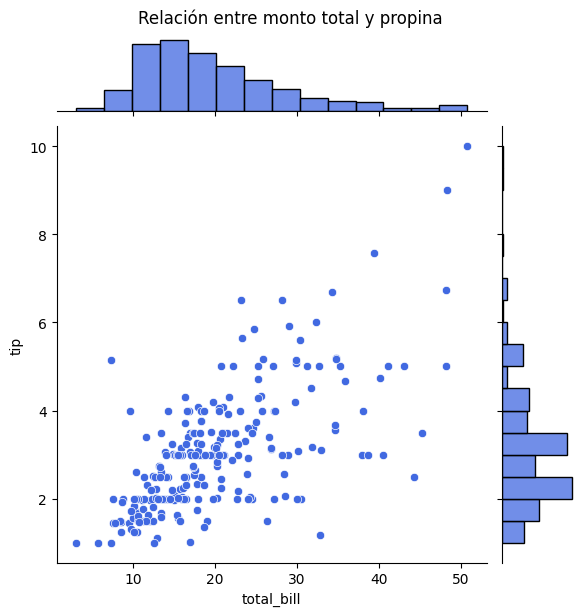

In [ ]:
# Importamos librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset 'tips'
df_tips = sns.load_dataset("tips")

# Jointplot básico
sns.jointplot(
    data=df_tips,
    x="total_bill", y="tip",
    kind="scatter", color="royalblue"
)

# Personalización
plt.suptitle("Relación entre monto total y propina", y=1.02)
plt.show()


### Jointplot avanzado con Seaborn

En este ejemplo mejoraremos la visualización y el análisis utilizando un tipo de gráfico distinto y opciones adicionales.

Características:

* Dataset: `penguins` (incluido en Seaborn).
* Mostraremos la relación entre:
  - `flipper_length_mm`: longitud de aletas.
  - `body_mass_g`: masa corporal.
* Parámetros adicionales:
  - `kind="kde"`: reemplaza el scatter por un mapa de densidad.
  - `fill=True`: rellena las curvas de densidad.
  - `hue`: colorea según una categoría (especie).
  - `palette`: define la paleta de colores.
  - `height`: ajusta el tamaño del gráfico.
* Este tipo de visualización es ideal para ver **agrupamientos o correlaciones no lineales**.


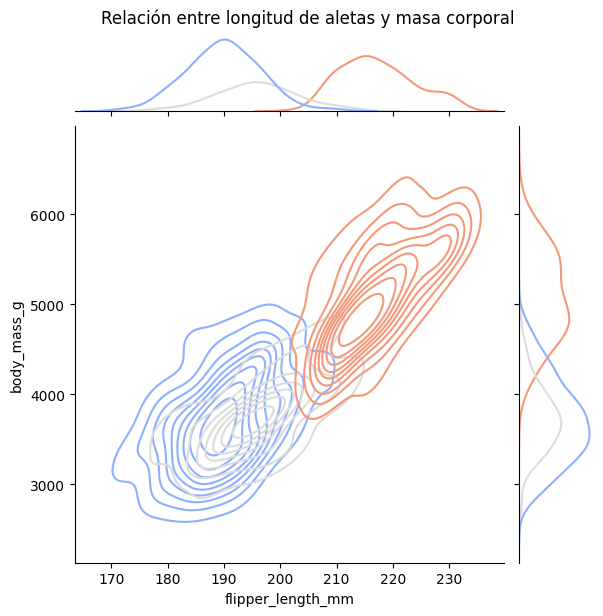

In [40]:
# Cargamos el dataset 'penguins'
df_penguins = sns.load_dataset("penguins")

# Jointplot avanzado con densidad y categorías
grafico = sns.jointplot(
    data=df_penguins,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    kind="kde",
    fill=False,
    palette="coolwarm",
    height=6
)

# --- Eliminamos la leyenda automática ---
if grafico.ax_joint.get_legend() is not None:
    grafico.ax_joint.get_legend().remove()

# Personalización
plt.suptitle("Relación entre longitud de aletas y masa corporal", y=1.02)
plt.show()


#

# Parámetros de color en Seaborn

**No todos los gráficos de Seaborn** admiten el parámetro `palette`, aunque **la mayoría de los que incluyen categorías de color (`hue`) sí lo hacen**.

Podemos resumirlo así:

---

### **Gráficos que sí aceptan `palette`**

Todos los que usan **colores asociados a una variable categórica** a través del parámetro `hue` o `group`, por ejemplo:

* `sns.barplot()`
* `sns.countplot()`
* `sns.boxplot()`
* `sns.violinplot()`
* `sns.scatterplot()`
* `sns.lineplot()`
* `sns.histplot()` (cuando se usa `hue`)
* `sns.kdeplot()` (cuando se usa `hue`)
* `sns.pairplot()` y `sns.jointplot()` (cuando incluyen `hue`)

---

### **Gráficos donde `palette` no tiene efecto**

En gráficos que representan **una sola variable numérica sin categorías**, no hay grupos a los que aplicar distintos colores:

* `sns.histplot(x="variable")` sin `hue`
* `sns.kdeplot(x="variable")` sin `hue`
* `sns.heatmap()` (usa `cmap` en lugar de `palette` para definir la escala de color continua)
* `sns.clustermap()` (también usa `cmap`)
* `sns.regplot()` (usa `color`, no `palette`, ya que dibuja una única relación)

---

* `palette` sirve cuando hay **categorías** (colores distintos).
* `color` se usa para **un solo conjunto** de datos.
* `cmap` se usa en **mapas de calor** o **densidades continuas**.



Esta es una **mini tabla comparativa** con los tres parámetros de color más comunes en Seaborn: `palette`, `color` y `cmap`.



| Parámetro     | Tipo de gráfico donde se usa                                                                         | Qué controla                                                     | Ejemplo de uso                                                                | Notas                                                                                                                 |
| ------------- | ---------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- | ----------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **`palette`** | Gráficos con categorías (`hue`) como `barplot`, `boxplot`, `violinplot`, `scatterplot`, `lineplot`   | Define una **paleta de colores categórica** (un color por grupo) | `sns.barplot(data=df, x="grupo", y="valor", hue="categoria", palette="Set2")` | Se aplica cuando hay más de una categoría. Admite nombres predefinidos como `"pastel"`, `"muted"`, `"coolwarm"`, etc. |
| **`color`**   | Gráficos simples sin `hue`, como `regplot`, `histplot`, `kdeplot` o `barplot` de una sola serie      | Asigna **un único color** al gráfico completo                    | `sns.regplot(data=df, x="edad", y="ingresos", color="teal")`                  | Útil cuando solo hay una serie o categoría.                                                                           |
| **`cmap`**    | Gráficos con **valores continuos**, como `heatmap`, `kdeplot`, `jointplot(kind="kde")`, `clustermap` | Define una **escala de color gradual** (de menor a mayor valor)  | `sns.heatmap(data=df.corr(), cmap="YlGnBu", annot=True)`                      | Ideal para representar intensidades o densidades.                                                                     |

---

**Tip práctico:**

* `palette` : varios colores distintos (categorías).
* `color` : un color único.
* `cmap` : un degradado continuo.


La tabla siguiente tiene los **los principales valores que admiten los parámetros `palette`, `color` y `cmap`**, junto con una descripción del tipo de colores que generan.

Se incluyen tanto los **nombres predefinidos** (de Seaborn y Matplotlib) como algunas **paletas cualitativas y secuenciales comunes**.

---

### Tabla de paletas y mapas de color en Seaborn

| Nombre         | Tipo                                      | Colores principales / descripción                                                                    | Ejemplo de uso                           |
| -------------- | ----------------------------------------- | ---------------------------------------------------------------------------------------------------- | ---------------------------------------- |
| `"deep"`       | Paleta categórica                         | Azul, naranja, verde, rojo, violeta, marrón, rosa                                                    | `palette="deep"`                         |
| `"muted"`      | Paleta categórica                         | Tonos suaves de azul, naranja, verde, rojo, violeta, marrón                                          | `palette="muted"`                        |
| `"pastel"`     | Paleta categórica                         | Tonos pálidos y desaturados, aspecto claro                                                           | `palette="pastel"`                       |
| `"bright"`     | Paleta categórica                         | Colores vivos y saturados                                                                            | `palette="bright"`                       |
| `"dark"`       | Paleta categórica                         | Tonos oscuros de los colores básicos                                                                 | `palette="dark"`                         |
| `"colorblind"` | Paleta categórica                         | Diseñada para buena visibilidad en personas con daltonismo                                           | `palette="colorblind"`                   |
| `"tab10"`      | Paleta categórica (Matplotlib)            | 10 colores bien diferenciados (azul, naranja, verde, rojo, violeta, marrón, rosa, gris, oliva, cian) | `palette="tab10"`                        |
| `"Set1"`       | Paleta categórica (ColorBrewer)           | Rojo, azul, verde, violeta, naranja, amarillo, marrón, gris                                          | `palette="Set1"`                         |
| `"Set2"`       | Paleta categórica (ColorBrewer)           | Verde, naranja, violeta, rosado, marrón, gris                                                        | `palette="Set2"`                         |
| `"Set3"`       | Paleta categórica (ColorBrewer)           | Colores pastel variados                                                                              | `palette="Set3"`                         |
| `"husl"`       | Paleta circular                           | Paleta de colores equidistantes en el círculo HUSL                                                   | `palette="husl"`                         |
| `"hls"`        | Paleta circular                           | Similar a husl pero con control de saturación y luminosidad                                          | `palette="hls"`                          |
| `"coolwarm"`   | Paleta divergente                         | De azul claro a rojo anaranjado                                                                      | `palette="coolwarm"` o `cmap="coolwarm"` |
| `"RdBu"`       | Paleta divergente (ColorBrewer)           | Rojo ↔ Azul, simétrica                                                                               | `palette="RdBu"`                         |
| `"Spectral"`   | Paleta divergente                         | Rojo → amarillo → verde → azul                                                                       | `cmap="Spectral"`                        |
| `"viridis"`    | Paleta secuencial                         | Del violeta al amarillo (muy usada, perceptualmente uniforme)                                        | `cmap="viridis"`                         |
| `"plasma"`     | Paleta secuencial                         | Del violeta oscuro al amarillo intenso                                                               | `cmap="plasma"`                          |
| `"magma"`      | Paleta secuencial                         | Del negro al amarillo claro                                                                          | `cmap="magma"`                           |
| `"inferno"`    | Paleta secuencial                         | Del negro al naranja brillante                                                                       | `cmap="inferno"`                         |
| `"cividis"`    | Paleta secuencial                         | Similar a viridis, optimizada para daltonismo                                                        | `cmap="cividis"`                         |
| `"YlOrBr"`     | Paleta secuencial (ColorBrewer)           | Amarillo → naranja → marrón                                                                          | `cmap="YlOrBr"`                          |
| `"YlGnBu"`     | Paleta secuencial (ColorBrewer)           | Amarillo → verde → azul                                                                              | `cmap="YlGnBu"`                          |
| `"BuPu"`       | Paleta secuencial                         | Azul → violeta                                                                                       | `cmap="BuPu"`                            |
| `"cubehelix"`  | Paleta secuencial                         | Escala perceptualmente uniforme en espiral                                                           | `palette="cubehelix"`                    |
| `"crest"`      | Paleta secuencial moderna (Seaborn 0.11+) | Azul → celeste → blanco                                                                              | `cmap="crest"`                           |
| `"flare"`      | Paleta secuencial moderna                 | Rojo → rosa → blanco                                                                                 | `cmap="flare"`                           |
| `"rocket"`     | Paleta secuencial moderna                 | Negro → violeta → rosa → blanco                                                                      | `cmap="rocket"`                          |
| `"mako"`       | Paleta secuencial moderna                 | Azul oscuro → celeste → blanco                                                                       | `cmap="mako"`                            |
| `"icefire"`    | Paleta divergente moderna                 | Azul → gris → rojo                                                                                   | `cmap="icefire"`                         |

---

 **Tips prácticos:**

* `palette=` se usa con nombres de paletas categóricas o secuenciales cuando hay **variables discretas** (hue).
* `cmap=` se usa con **valores continuos** (por ejemplo en `heatmap`, `kdeplot` o `jointplot(kind="kde")`).
* También podés crear tus propias paletas con `sns.color_palette(["#RRGGBB", ...])`.

